# **Problem Statement:**
 **Goal :**

   The goal of this project is to evaluate a company's financial health using key performance indicators (KPIs) of its financial data. Although some crucial features for a full profit and loss analysis, such as assets, liabilities, and equity,  are missing, the analysis will focus on the available features related to profit and sales. The main objective of this project is to identify the factors impacting profit and explore ways to improve it. Additionally, evaluating the company's financial health will help uncover hidden opportunities or potential risks. This will be achieved by calculating financial ratios such as **Gross Profit Margin, Cost of Goods Sold (COGS) Margin, and Discount Ratios**. These KPIs provide a clear picture of the company's profitability and its efficiency in utilizing resources.

**Dataset Overview:**

   The dataset used for this analysis is sourced from [Microsoft Power BI Sample Financial Dataset](https://learn.microsoft.com/en-us/power-bi/create-reports/sample-financial-download). It contains financial data of a retail company, including  COGS, Gross Sales, Sales, Discounts, along with geographical data, product categories, and time-based data.



**Questions to Address :**
  


1.   Is the business profitable and efficient?
2.   What are the main factors influencing profit, and how significant is their impact?
3.   How do discounts affect profitability?


 To answer the third question, both statistical and financial methods will be used to evaluate how discounts impact profitability. Additionally, a machine learning model will be developed to identify patterns in profitability and find the most important factors influencing it.



# **Data Preparation**







In [491]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [492]:
import os
os.listdir('/content/drive/My Drive/Colab Notebooks')

['Financial Sample.xlsx', 'Profit analysis.ipynb']

In [493]:
import pandas as pd

df=pd.read_excel("/content/drive/My Drive/Colab Notebooks/Financial Sample.xlsx")
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,NaN,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,NaN,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


In [494]:
df.columns  #The name of sales column starts with a space!!

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       ' Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [495]:
df.info()  #To check the type of data and NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        647 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           700 non-null    int64         
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

**Discount Band is the only column with missing values!!!** ->56 in total.


In [496]:
df.groupby("Discount Band")["Discounts"].agg(["min", "max", "mean"])

,min,max,mean
Discount Band,,,
High,274.40,149677.5,21702.148061
Low,18.41,48300.0,5535.473750
Medium,110.46,102667.5,12407.215558


It seems that the Discount Band has some labeling issues, the maximum value in 'Low' should be less than the minimum value in 'Medium', which is not the case here. Since we cannot fill NaN values based on the relationship between Discount Band and Discounts, we will rely only on the Discounts column.

## **Duplicates**:

In [497]:
df.duplicated().value_counts()

,count
False,700


There are no duplicates, since all values of the previous result are False.

The following code checks if any rows have the same segment, country, discount band, product, date, month number, and year. If so, it creates a list of their indices.

In [498]:
col=['Segment', 'Country', 'Discount Band', 'Product', 'Date','Month Number', 'Year']

duplicates = df.duplicated(subset=col, keep=False)
index = [df.index[duplicates]]
index

[Index([244, 245, 255, 265, 266, 282, 302, 303, 304, 325, 360, 363, 384, 394,
        395, 443, 533, 543, 544, 574, 585, 622, 636, 664],
       dtype='int64')]

There are some duplicates, which can be explained by selling different versions of the same product at different prices on the same day in the same country and segment. To avoid redundancy, we can sum the remaining values (aggregation).

In [499]:
new_df=df.groupby(col).sum().reset_index()
new_df.head()

,Segment,Country,Discount Band,Product,Date,Month Number,Year,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Name
0,Channel Partners,Canada,High,Amarilla,2013-09-01,9,2013,2761.0,260,12,33132.0,3975.84,29156.16,8283.0,20873.16,September
1,Channel Partners,Canada,High,Amarilla,2014-04-01,4,2014,3520.5,260,12,42246.0,4224.60,38021.40,10561.5,27459.90,April
2,Channel Partners,Canada,High,Carretera,2014-02-01,2,2014,1937.0,3,12,23244.0,2556.84,20687.16,5811.0,14876.16,February
3,Channel Partners,Canada,High,Paseo,2013-11-01,11,2013,2222.0,10,12,26664.0,3732.96,22931.04,6666.0,16265.04,November
4,Channel Partners,Canada,High,Paseo,2014-07-01,7,2014,4026.0,10,12,48312.0,5314.32,42997.68,12078.0,30919.68,July




The **Date** column is already in datetime format! But there is a redundancy when it come to dates. The three separate columns (day, month, and year) essentially repeat the same information. Also because ALL days are the first of the month! For our profit analysis, we only really need the year and month for the trend analysis.


---



In [500]:
new_df.drop(['Discount Band','Month Name','Date'],inplace=True,axis=1)


**The following code will checks whether all numerical values are correct using the formulas of sales, profit and COGS.**

In [501]:
import numpy as np
(new_df['Units Sold']*new_df['Sale Price']==new_df['Gross Sales']).value_counts()


,count
True,623
False,12


In [502]:
new_df[(new_df['Units Sold']*new_df['Sale Price']!=new_df['Gross Sales'])].head()


,Segment,Country,Product,Month Number,Year,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit
191,Government,Canada,Montana,10,2014,3983.0,10,27,44118.0,5543.96,38574.04,26160.0,12414.04
219,Government,Canada,Amarilla,6,2014,1843.0,520,27,22105.0,1688.95,20416.05,12755.0,7661.05
228,Government,Canada,Paseo,10,2013,2617.0,20,370,457580.0,22879.00,434701.00,333170.0,101531.00
267,Government,France,Amarilla,10,2013,3479.0,520,357,736421.0,44185.26,692235.74,546775.0,145460.74
271,Government,France,Montana,10,2013,3160.0,10,27,44961.0,2697.66,42263.34,24585.0,17678.34


The previous code shows some rows where Units sold multiplied by the Sale price does not equal the Gross profit, This is because these rows contain the same product, but different prices. For example :

In [503]:
df.iloc[[543,585]]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
543,Government,Canada,Montana,High,2734.0,5,7,19138.0,2296.56,16841.44,13670.0,3171.44,2014-10-01,10,October,2014
585,Government,Canada,Montana,High,1249.0,5,20,24980.0,3247.40,21732.60,12490.0,9242.60,2014-10-01,10,October,2014


**Checking the relationship between Sales, Profit and COGS(Cost of goods sold):**

In [504]:
(new_df[' Sales'] - new_df['Profit']==new_df['COGS']).value_counts()

,count
True,625
False,10


In [505]:
new_df[(new_df[' Sales'] - new_df['Profit']!=new_df['COGS'])].head()

,Segment,Country,Product,Month Number,Year,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit
1,Channel Partners,Canada,Amarilla,4,2014,3520.5,260,12,42246.0,4224.60,38021.40,10561.5,27459.90
191,Government,Canada,Montana,10,2014,3983.0,10,27,44118.0,5543.96,38574.04,26160.0,12414.04
217,Government,Canada,Velo,4,2014,3850.5,120,20,77010.0,2310.30,74699.70,38505.0,36194.70
219,Government,Canada,Amarilla,6,2014,1843.0,520,27,22105.0,1688.95,20416.05,12755.0,7661.05
239,Government,France,Carretera,1,2014,2521.5,3,20,50430.0,6051.60,44378.40,25215.0,19163.40


It seems that these values are correct based on manual calculation, as Sales equals Profit plus COGS.

## **Dummy variables**

Since we have three categorical  columns of type object (Segment, Country and Product), transforming these columns is necessarly for future analysis and modeling !

In [506]:
print(new_df['Country'].unique()) # 5 values
print(new_df['Segment'].unique()) # 5 values
print(new_df['Product'].unique()) # 6 values

['Canada' 'France' 'Germany' 'Mexico' 'United States of America']
['Channel Partners' 'Enterprise' 'Government' 'Midmarket' 'Small Business']
['Amarilla' 'Carretera' 'Paseo' 'VTT' 'Montana' 'Velo']


Since the dataset is small, working with pandas and get_dummies is a good choice.

In [507]:
new_df=pd.get_dummies(new_df,columns=['Segment','Country','Product'], dtype=int)
new_df.head()

,Month Number,Year,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,...,Country_France,Country_Germany,Country_Mexico,Country_United States of America,Product_Amarilla,Product_Carretera,Product_Montana,Product_Paseo,Product_VTT,Product_Velo
0,9,2013,2761.0,260,12,33132.0,3975.84,29156.16,8283.0,20873.16,...,0,0,0,0,1,0,0,0,0,0
1,4,2014,3520.5,260,12,42246.0,4224.60,38021.40,10561.5,27459.90,...,0,0,0,0,1,0,0,0,0,0
2,2,2014,1937.0,3,12,23244.0,2556.84,20687.16,5811.0,14876.16,...,0,0,0,0,0,1,0,0,0,0
3,11,2013,2222.0,10,12,26664.0,3732.96,22931.04,6666.0,16265.04,...,0,0,0,0,0,0,0,1,0,0
4,7,2014,4026.0,10,12,48312.0,5314.32,42997.68,12078.0,30919.68,...,0,0,0,0,0,0,0,1,0,0


In [508]:
new_df.info() # To make sure all values are numerical and ready for future analysis and modeling.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Month Number                      635 non-null    int64  
 1   Year                              635 non-null    int64  
 2   Units Sold                        635 non-null    float64
 3   Manufacturing Price               635 non-null    int64  
 4   Sale Price                        635 non-null    int64  
 5   Gross Sales                       635 non-null    float64
 6   Discounts                         635 non-null    float64
 7    Sales                            635 non-null    float64
 8   COGS                              635 non-null    float64
 9   Profit                            635 non-null    float64
 10  Segment_Channel Partners          635 non-null    int64  
 11  Segment_Enterprise                635 non-null    int64  
 12  Segment_

# **Financial KPIs (Trend Analysis):**

The goal of this section is to analyze the profitability and efficiency of the company using three ratios : Gross profit margin, COGS margin and Discount Ratio. The best indicator for an organization's health would be multiple seasons, especially if we can't compare its profitability with competitors. Therefore, the trend analysis will be month based to compare ratios of each month for more clarity.To do so, grouping the data By month is the first step.



 **1.   Gross profit margin**




This KPI measures the percentage of revenue remaining after accounting for the cost of goods sold (COGS). It reflects the efficiency of production and pricing.

**FORMULA :**

\begin{equation}
\text{Gross Profit Margin} = \frac{ \text{Profit}}{\text{Net Sales}} \times 100
\end{equation}

 A high gross profit margin indicates efficient operations, while a low margin suggests areas needing improvement (It can impact a company’s bottom line (Net Profit) and means there are areas that can be improved).

 Gross Profit Margin (GPM) reflects:

* **Pricing strategy**

* **Supplier/cost efficiency**

 **2.COGS margin:**

the COGS margin ratio represents the percentage of each dollar of revenue generated that is spent on cost of goods sold (COGS).

**Formula :**


\begin{equation}
\text{COGS Margin} = \frac{ \text{Cost of Goods Sold}}{\text{Net Sales}} \times100
\end{equation}


 **3.Discount Ratio :**

Discount Ratio helps understand how much the price is reduced on average, and how significant the discounts are in relation to the original sales. High discount ratios might impact overall profitability if not managed carefully.

**Formula :**

\begin{equation}
\text{Discount Ratio} = \frac{\text{Sales Discount}}{\text{Gross Sales}} \times 100
\end{equation}

In [509]:
monthly=new_df.groupby(['Year', 'Month Number']).sum().reset_index()
monthly=monthly[['Year','Month Number', 'Gross Sales','Discounts',' Sales','COGS','Profit']]
monthly['Month-Year']=monthly['Month Number'].astype(str)+'-'+monthly['Year'].astype(str)
monthly.drop(['Year', 'Month Number'],inplace=True,axis=1)
monthly

,Gross Sales,Discounts,Sales,COGS,Profit,Month-Year
0,3950651.0,245735.97,3704915.03,3120887.0,584028.03,9-2013
1,9742438.0,533076.90,9209361.10,7555016.0,1654345.10,10-2013
2,7552644.0,900134.70,6652509.30,6050465.0,602044.30,11-2013
3,5802745.0,466583.92,5336161.08,4655357.0,680804.08,12-2013
4,7238162.5,699641.82,6538520.68,5756873.0,781647.68,1-2014
5,5890451.0,401669.61,5488781.39,4704594.0,784187.39,2-2014
6,6084279.0,537166.13,5547112.87,4901300.0,645812.87,3-2014
7,6844463.0,464617.43,6379845.57,5514077.5,865768.07,4-2014
8,6767911.0,557699.94,6210211.06,5381571.0,828640.06,5-2014
9,9225220.0,750078.18,8475141.82,7348942.0,1126199.82,6-2014


In [510]:
monthly['GPM']=(monthly['Profit']/monthly[' Sales'])*100 # Gross Profit Margin
monthly['COGSM']=(monthly['COGS']/monthly[' Sales'])*100 # COGS Margin
monthly['DR']=(monthly['Discounts']/monthly['Gross Sales'])*100 # Discount Ratio
monthly

,Gross Sales,Discounts,Sales,COGS,Profit,Month-Year,GPM,COGSM,DR
0,3950651.0,245735.97,3704915.03,3120887.0,584028.03,9-2013,15.763601,84.236399,6.220139
1,9742438.0,533076.90,9209361.10,7555016.0,1654345.10,10-2013,17.963734,82.036266,5.471699
2,7552644.0,900134.70,6652509.30,6050465.0,602044.30,11-2013,9.049883,90.950117,11.918140
3,5802745.0,466583.92,5336161.08,4655357.0,680804.08,12-2013,12.758312,87.241688,8.040745
4,7238162.5,699641.82,6538520.68,5756873.0,781647.68,1-2014,11.954503,88.045497,9.666014
5,5890451.0,401669.61,5488781.39,4704594.0,784187.39,2-2014,14.287095,85.712905,6.818996
6,6084279.0,537166.13,5547112.87,4901300.0,645812.87,3-2014,11.642324,88.357676,8.828756
7,6844463.0,464617.43,6379845.57,5514077.5,865768.07,4-2014,13.570361,86.429639,6.788223
8,6767911.0,557699.94,6210211.06,5381571.0,828640.06,5-2014,13.343187,86.656813,8.240356
9,9225220.0,750078.18,8475141.82,7348942.0,1126199.82,6-2014,13.288271,86.711729,8.130735


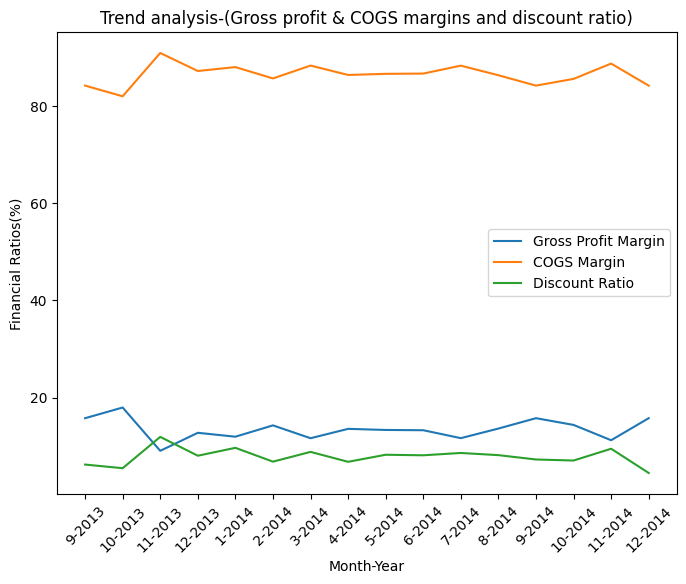

In [511]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.plot(monthly['Month-Year'],monthly['GPM'],label='Gross Profit Margin')
plt.plot(monthly['Month-Year'],monthly['COGSM'],label='COGS Margin')
plt.plot(monthly['Month-Year'],monthly['DR'],label='Discount Ratio')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.ylabel('Financial Ratios(%)')
plt.legend()
plt.title('Trend analysis-(Gross profit & COGS margins and discount ratio)')
plt.show()

**LIMITATIONS**:

* Expense data are missing, this feature is a big deal for real business analysis,because they account for costs like salaries, marketing, rent...

* Since we only have gross profit margin (not net profit), we can not see the full picture, because operating expenses and taxes are included in our profit.



**Key Insights from the Trend analysis:**

1.  **High COGS, Low Profit Margins:**

  The COGS margin is very high, meaning a large portion of revenue is being spent on the cost of goods sold, and the gross profit margin is low (under 20%).

  **Possible reasons for this:**

    * The company might be paying too much for supplies.

    * Pricing strategy could be too weak.

2. **No Improvement Over Time:**

   The profit margin isn’t showing any segnificant upward trend. This could mean:

  * The business isn’t making changes to reduce costs or optimize pricing.

  * The market is highly competitive, making it hard to raise prices.

   A stagnant profit margin isn’t necessarily bad if the business is stable, but there may be opportunities for growth.

3.  **Discounts and Profitability:**

   There’s a noticeable relationship between discounts and margins:

 *  *When discounts increase → COGS margin also goes up.*

 *  *When discounts increase → Gross profit margin goes down.*  

 **Possible reasons for this:**

   *  Discounts may increase sales volume, they also reduce profitability.

4. **Flat Trends :**

  The trend lines for gross profit margin, COGS margin, and discount ratio are all relatively flat over time. This could mean:

   *  The business has a consistent cost structure and pricing strategy.

   *   No major improvements in efficiency or profitability.






# **EDA**

In this section, we'll analyze feature relationships with Profit through the heatmap and visual plots.

### **Correlation Heatmap :**

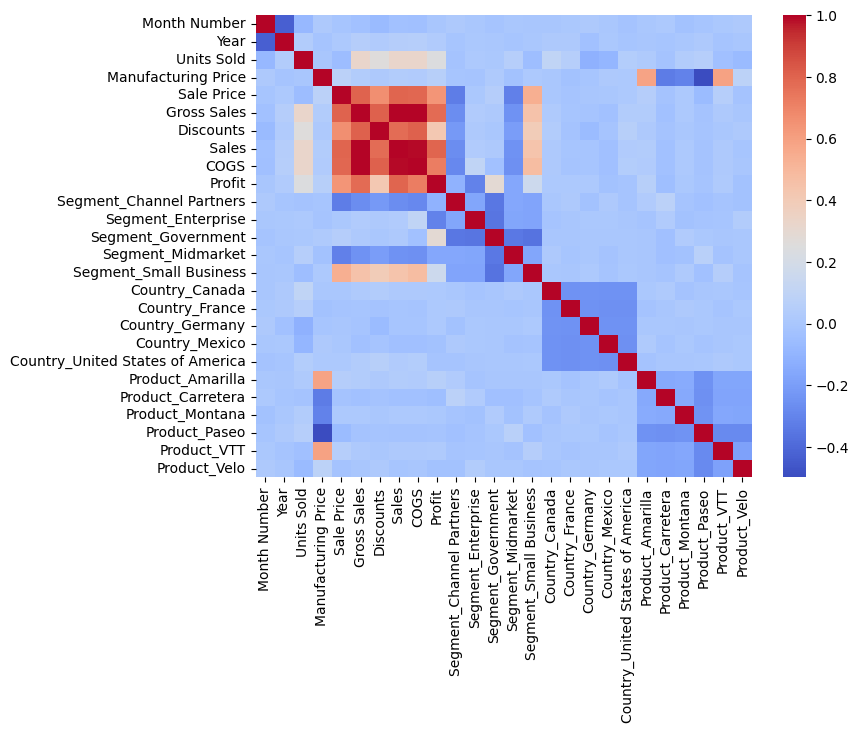

In [512]:
correlation_matrix = new_df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.show()


In [513]:
correlation_matrix['Profit'].sort_values(ascending=False) #Since the aim of these analysis is to have a clear picture of the profiability of the company.

,Profit
Profit,1.000000
Sales,0.800763
Gross Sales,0.780733
COGS,0.721054
Sale Price,0.638147
Discounts,0.418146
Segment_Government,0.291823
Units Sold,0.240742
Segment_Small Business,0.161685
Manufacturing Price,0.061331


*  The strongest positive correlations with Profit come from:

 *    Sales (0.80)
 *  Gross Sales (0.78)
 *  COGS (0.72)
 *  Sale Price (0.64).

 These features should be prioritized as they impact the profit the most.

* Among Segments, Government (0.29) and Small Business (0.16) show positive correlations.

* Discounts show a moderate positive correlation (0.42), but ***correlation doesn't imply causation.***



###Discount effect on profit :


Ordinary Least Squares (OLS) regression will help us measure how discounts affect profit. The model assumes a linear relationship between discounts  and profit, which we can represent as:
  $$
\text{Profit} = \beta_0 + \beta_1 \cdot \text{Discounts} + \epsilon
$$  
Where:

  * $β0$(intercept): The expected profit when discounts are zero

  * $β1$(coefficient): How much profit changes for each unit increase in discounts


  * $ϵ$ (error): The difference between predicted and actual profit

In [514]:
import statsmodels.api as sm

X = new_df[['Discounts']]
X = sm.add_constant(X)
y = new_df['Profit']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           2.88e-28
Time:                        22:30:56   Log-Likelihood:                -7604.8
No. Observations:                 635   AIC:                         1.521e+04
Df Residuals:                     633   BIC:                         1.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.304e+04   1791.613      7.279      0.0

1. **Interpretation of R-squared (17.5%):**

  17.5% of the variation in profit is explained by discounts. This relatively low value indicates that:

   *  Discounts alone are not a strong predictor of profit.

  *   Other factors (like Sales, COGS, etc.) likely explain the remaining of profit variation.

2. **Discounts Coefficient (β₁ = 0.7470):**

   For every 1-unit increase in discounts, profit increases by 0.75.
This suggests a small but positive effect

   **Possible explanations:**

     * Discounts may drive higher sales volume

3. **P-value (0.000):**

   * The effect is statistically significant (p < 0.05)

   * We can reject the null hypothesis (discounts don't affect profit)




####Profit by Discount :

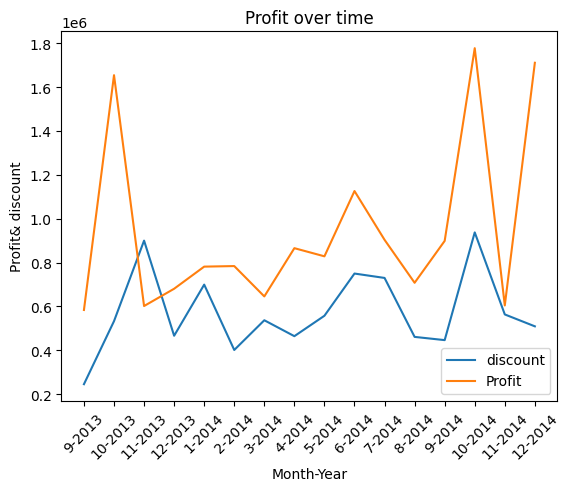

In [515]:
plt.plot(monthly['Month-Year'], monthly['Discounts'],label='discount')
plt.plot(monthly['Month-Year'], monthly['Profit'],label='Profit')
plt.ylabel('Profit& discount')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.title('Profit over time')
plt.legend()

Text(0.5, 1.0, 'Profit over Discount Ratio')

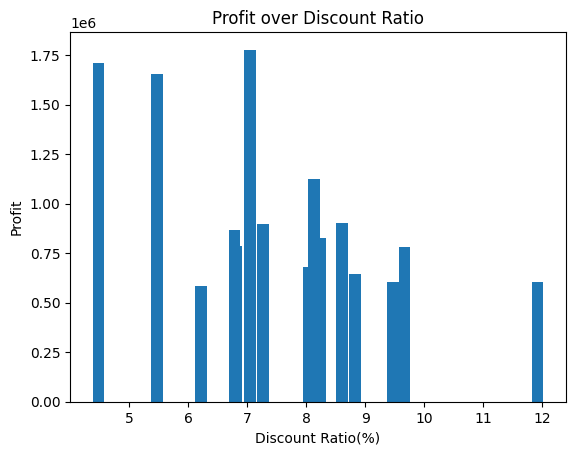

In [516]:
plt.bar(monthly['DR'],monthly['Profit'], width = 0.2)
plt.xlabel('Discount Ratio(%)')
plt.ylabel('Profit')
plt.title('Profit over Discount Ratio')

Discounts appear to be correlated with profit, which is obvious because customers tend to buy more discounted products. However, the last plot shows that higher discount ratios may lead to lower profit, while lower discount ratios( between 4% and 7%) may lead to higher profit.

Discounts are effective when used strategically, they encourage purchases and can boost revenue. But aggressive discounting can be dangerous and may negatively impact the bottom line( Net profit) if overused. The key is finding the right balance to optimize the profit.

####Binning Method:



To identify the safest discount range that boosts sales without reducing profit, we wll apply the binning method to split our data into intervals. This approach relies exclusively on historical patterns!

In [517]:
labels = ['0-2%', '2-4%', '4-6%', '6-8%', '8-10%', '10-12%', '12%+']
# Create discount ratio bins
bin= pd.DataFrame({'Discount Ratio': monthly['DR'],
                   'Profit': monthly['Profit'],
                   'Discount':monthly['Discounts']
                   })
bin['bins'] = pd.cut(x=bin['Discount Ratio'], bins=[0,2,4,6,8,10,12,20], labels=labels)
bin

,Discount Ratio,Profit,Discount,bins
0,6.220139,584028.03,245735.97,6-8%
1,5.471699,1654345.10,533076.90,4-6%
2,11.918140,602044.30,900134.70,10-12%
3,8.040745,680804.08,466583.92,8-10%
4,9.666014,781647.68,699641.82,8-10%
5,6.818996,784187.39,401669.61,6-8%
6,8.828756,645812.87,537166.13,8-10%
7,6.788223,865768.07,464617.43,6-8%
8,8.240356,828640.06,557699.94,8-10%
9,8.130735,1126199.82,750078.18,8-10%


Text(0, 0.5, 'Profit')

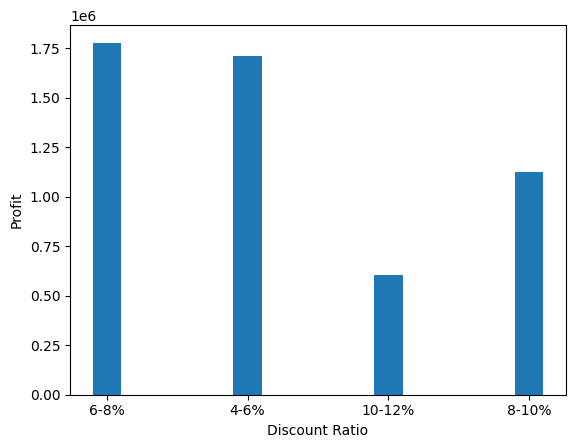

In [518]:
plt.bar(bin['bins'],bin['Profit'], width = 0.2)
plt.xlabel('Discount Ratio')
plt.ylabel('Profit')

Fantastic! Now we have a clear picture of the safest discount range that increases profit. The analysis shows discounts closest to **4-8%** of gross sales tend to give better results. However, some lower profits still occur within this range (especially 6-8%) as shown in the *Profit over Discount Ratio* barplot, indicating other influencing factors, for example, product differences (some products respond better to discounts than others) and seasonal trends (certain months outperform others even with identical discounts).





####Discount Elasticity :


To measure how sensitive profit is to discount changes, we'll apply the elasticity method to our discount data.By calculating the percentage change in profit divided by the percentage change in discount ratio:



$$
\text{Discount Elasticity} = \frac{\%\Delta \text{Profit}}{\%\Delta \text{Discount Ratio}}
$$


*  If Elasticity > 1 → Discounting is effective (profit grows significantly with discounts).
*  If Elasticity < 1 but > 0 → Discounting has a weak effect.
*  If Elasticity < 0 → Discounting is reducing profit.

The optimal discount range will be where Elasticity is highest but still positive.

In [519]:
monthly['Profit_Change'] = monthly['Profit'].pct_change()
monthly['DR_Change'] = monthly['DR'].pct_change()

monthly['Discount_Elasticity'] = monthly['Profit_Change'] / monthly['DR_Change']

optimal_index = monthly['Discount_Elasticity'].idxmax()
optimal_discount_ratio = monthly.loc[optimal_index, 'DR']
optimal_profit = monthly.loc[optimal_index, 'Profit']
print(f"The optimal discount ratio is {optimal_discount_ratio:.2f}% with a profit of {optimal_profit:.2f}$")
monthly['Discount_Elasticity']

The optimal discount ratio is 8.16% with a profit of 708026.42$


,Discount_Elasticity
0,NaN
1,-15.230780
2,-0.539903
3,-0.402110
4,0.732820
5,-0.011031
6,-0.598705
7,-1.473613
8,-0.200470
9,-26.993622


Most of the data shows negative elasticity, which means discounting has a negative impact on profit, except for two values: one between 0 and 1 (indicating a weak positive effect of discounting), and another higher than 1 which is the optimal value for maximizing profit, corresponding to a discount ratio of **8.12%**.

### Profit by Segment :

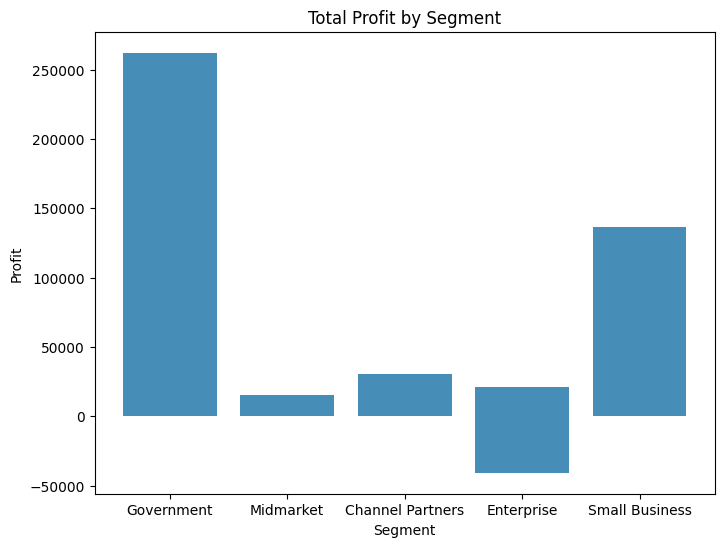

In [520]:
#plot of profit by segments
plt. figure(figsize=(8,6))
plt.bar(df['Segment'], df['Profit'], color="#468eb8")
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.title('Total Profit by Segment')
plt.show()


This plot confirms the correlation matrix findings: Government is the most profitable segment (and most strongly correlated with profit), followed by Small Business. The other three segments—Midmarket, Channel Partners, and Enterprise—show significantly lower profitability, with Enterprise actually generating negative profits. Analyzing each segment’s pricing strategies, customer base, and cost structures could help explain these profit patterns.





### Profit by Country :

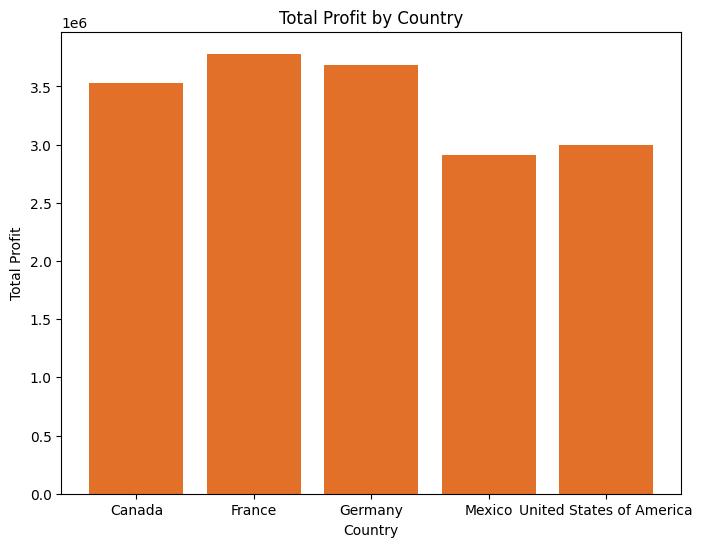

In [521]:
profit_country = df.groupby('Country')['Profit'].sum().reset_index()
plt. figure(figsize=(8,6))
plt.bar(profit_country['Country'], profit_country['Profit'], color='#e37029')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.title('Total Profit by Country')
plt.show()

The plot shows France is the most profitable, followed by Germany and Canada. The United States and Mexico are the least profitable. This reveals some surprising patterns. These differences likely come from country-specific tax rules and business regulations, which vary significantly across markets.

Text(0.5, 1.0, 'Average Profit by Coutry')

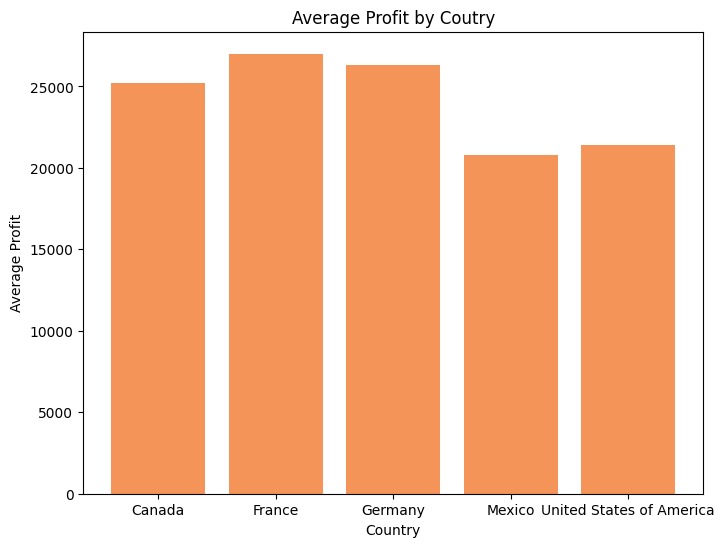

In [522]:
avg_profit_country = df.groupby('Country')['Profit'].mean().reset_index()
plt. figure(figsize=(8,6))
plt.bar(avg_profit_country['Country'], avg_profit_country['Profit'],color='#f59458')
plt.xlabel('Country')
plt.ylabel('Average Profit')
plt.title('Average Profit by Coutry')

The plot shows France is the most profitable, followed by Germany and Canada. The United States and Mexico are the least profitable. This matches what we see in the total profit.

Text(0.5, 1.0, 'Variance in Profit by Coutry')

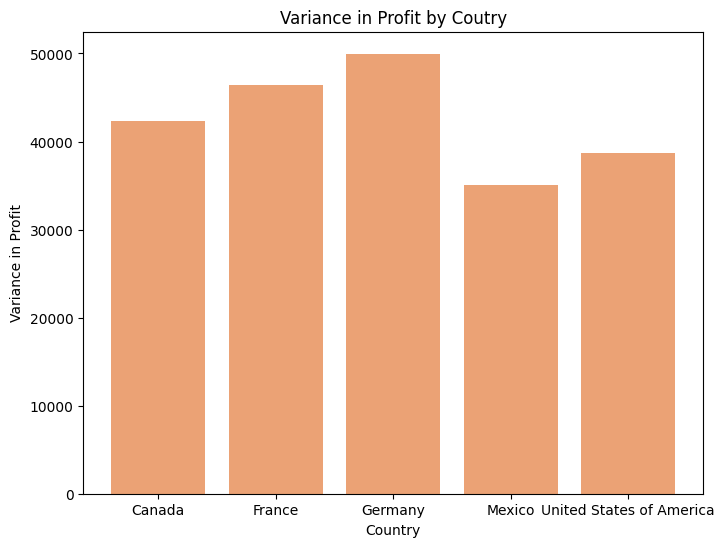

In [523]:
std_profit_country = df.groupby('Country')['Profit'].std().reset_index()
plt. figure(figsize=(8,6))
plt.bar(std_profit_country['Country'], std_profit_country['Profit'],color='#eba275')
plt.xlabel('Country')
plt.ylabel('Variance in Profit')
plt.title('Variance in Profit by Coutry')

* Variance tells us how spread out the profits are within each country.
* A high variance means some transactions generate very high or very low profit.
* A low variance suggests profit is more consistent across sales,very high or very low-profit transactions are rare.

Profit is more consistent in Mexico which has the lowest average and total profit.


Germany, France and Canada have higher variance in profit, meaning some sales bring very high profits while others may result in low or even negative profits.This might be due to having some high-value purchases and some low-value purchases.




To make sure all the previous parameters( total,mean and variance in profit ) aren't affected by any other variable we will look at the number of transactions per country, which seem to be the same!

In [524]:
count_profit_country = df.groupby('Country')['Profit'].count().reset_index()
count_profit_country

,Country,Profit
0,Canada,140
1,France,140
2,Germany,140
3,Mexico,140
4,United States of America,140


Final review:
* France leads in profitability (high total/average profit) but with a high variance, suggesting a mix of premium and discount sales.
* Germany and Canada show similar patterns.
* Mexico consistently underperforms across all metrics compared to other countries.

###Profit by Product:

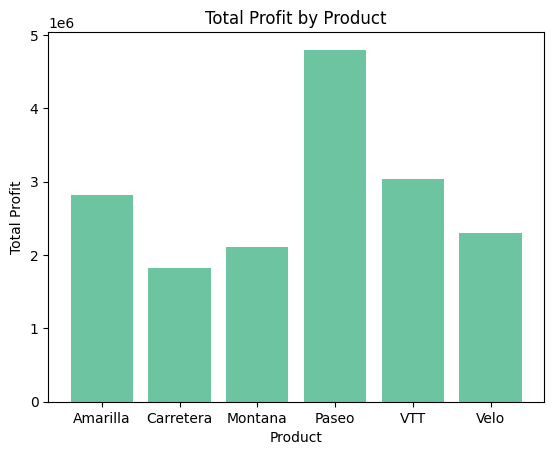

In [525]:
profit_prod = df.groupby('Product')['Profit'].sum().reset_index()
plt.bar(profit_prod['Product'], profit_prod['Profit'], color='#6cc4a1')
plt.xlabel('Product')
plt.ylabel('Total Profit')
plt.title('Total Profit by Product')
plt.show()

The plot shows **Paseo** is by far the most profitable product, with profits much higher than all others.

 **Amarilla** and **VIT** appear to be mid-range performers, while **Carretera,** **Montana,** and **Velo** are the least profitable.

Possible reasons some products outperform others:
* Cost Differences
* Pricing and discounting
* Sales Volume
* Customer Base
* Operational Factors

#**Key features impacting profit :**

The goal of this part is to identify which features are linked to high and low profit using a machine learning model.

### Random Forest Model:

In [526]:
new_df['Profit margin']=(new_df['Profit']/new_df[' Sales'])*100 # working with profit margin is more efficient for analyzing profitability
new_df.columns

Index(['Month Number', 'Year', 'Units Sold', 'Manufacturing Price',
       'Sale Price', 'Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit',
       'Segment_Channel Partners', 'Segment_Enterprise', 'Segment_Government',
       'Segment_Midmarket', 'Segment_Small Business', 'Country_Canada',
       'Country_France', 'Country_Germany', 'Country_Mexico',
       'Country_United States of America', 'Product_Amarilla',
       'Product_Carretera', 'Product_Montana', 'Product_Paseo', 'Product_VTT',
       'Product_Velo', 'Profit margin'],
      dtype='object')

In [527]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X=new_df.drop(['Profit', 'Year','Profit margin'], axis=1) #Independant variables
y = new_df["Profit margin"] # The target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = RandomForestRegressor(n_estimators=100, random_state=10)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [528]:
importance = model.feature_importances_
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance}).sort_values("Importance", ascending=False)

print(feature_importance.head(24))

                             Feature  Importance
8           Segment_Channel Partners    0.596783
7                               COGS    0.184490
3                         Sale Price    0.128301
9                 Segment_Enterprise    0.054792
5                          Discounts    0.015091
12            Segment_Small Business    0.005108
10                Segment_Government    0.004888
6                              Sales    0.003435
4                        Gross Sales    0.002963
1                         Units Sold    0.001261
0                       Month Number    0.000631
2                Manufacturing Price    0.000624
11                 Segment_Midmarket    0.000458
15                   Country_Germany    0.000209
14                    Country_France    0.000161
17  Country_United States of America    0.000123
23                      Product_Velo    0.000118
16                    Country_Mexico    0.000116
21                     Product_Paseo    0.000099
13                  

*  Channel Partners alone drive ~60% of profit impact, with Enterprise clients adding another 5%.
* COGS (18%) and Sale Price (13%) together account for nearly a third of profit influence. The less it is the better.
*  Surprisingly, discounts barely matter (1.5%).Pricing is more important than  discounting for boosting profitability.




The high importance of Channel Partners (~60%) combined with the insignificance of Units Sold (0.1%) suggests potential data quality issues!

#**References:**

- https://www.wallstreetprep.com/knowledge/cogs-margin/
- https://ascensus-beratung.de/en/encyclopedia/cost-of-goods-ratio-cogs-definition-calculation-and-examples/
- https://www.growthforce.com/blog/how-giving-discounts-can-destroy-your-business-profits#:~:text=Your%20Profit%20Margin%20Takes%20a,made%20up%20with%20future%20opportunities%E2%80%A6
- [https://positivemomentum.com/the-dangers-of-discounting-and-how-to-get-it-right/#:~:text=But while discounting can help,a loss in business revenue](https://positivemomentum.com/the-dangers-of-discounting-and-how-to-get-it-right/#:~:text=But%20while%20discounting%20can%20help,a%20loss%20in%20business%20revenue).
- https://www.simon-kucher.com/en/insights/master-price-elasticity-key-profitable-pricing-strategies
- https://www.savemyexams.com/a-level/business/cie/23/revision-notes/marketing/marketing-analysis/promotional-elasticity-of-demand/
- https://www.investopedia.com/terms/g/gross_profit_margin.asp
- https://priceshape.com/glossary/price-elasticity

BOOK:
  * The Accounting Game: Basic Accounting Fresh from the Lemonade Stand - by Darrell Mullis and Judith Orloff
